In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
from sklearn.preprocessing import LabelEncoder
pd.options.display.float_format = '{:,.2f}'.format

In [18]:
POS_df = pd.read_csv(r"C:\Users\swift\Downloads\input\inputs\POS_CASH_balance.csv")

In [19]:
POS_df.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.00,45.00,Active,0,0,185279
1,1803195,-17,48.00,31.00,Active,0,0,185279
2,1803195,-21,48.00,35.00,Active,0,0,185279
3,1803195,-8,48.00,21.00,Active,0,0,185279
4,1803195,-4,48.00,17.00,Active,0,0,185279


In [20]:
POS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [21]:
POS_df.duplicated().sum()

0

In [22]:
# checking missing data
total = POS_df.isnull().sum().sort_values(ascending = False)
percent = (POS_df.isnull().sum()/POS_df.isnull().count()*100).sort_values(ascending = False)
missing_POS_df_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_df_data.head(3)

,Total,Percent
CNT_INSTALMENT_FUTURE,21878,0.26
CNT_INSTALMENT,21863,0.26
SK_ID_PREV,0,0.00


In [23]:
POS_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,"8,543,375.00","1,903,488.60","535,938.73","1,000,001.00","1,434,475.00","1,896,878.00","2,369,096.00","2,843,499.00"
MONTHS_BALANCE,"8,543,375.00",-34.95,26.05,-96.00,-54.00,-28.00,-13.00,-1.00
CNT_INSTALMENT,"8,521,512.00",17.03,12.00,1.00,10.00,12.00,24.00,84.00
CNT_INSTALMENT_FUTURE,"8,521,497.00",10.47,11.14,0.00,3.00,7.00,14.00,84.00
SK_DPD,"8,543,375.00",11.90,134.03,0.00,0.00,0.00,0.00,"4,231.00"
SK_DPD_DEF,"8,543,375.00",0.58,30.42,0.00,0.00,0.00,0.00,"3,373.00"
SK_ID_CURR,"8,543,375.00","153,535.56","88,716.61",0.00,"76,622.00","153,315.00","230,293.00","307,510.00"


<Axes: >

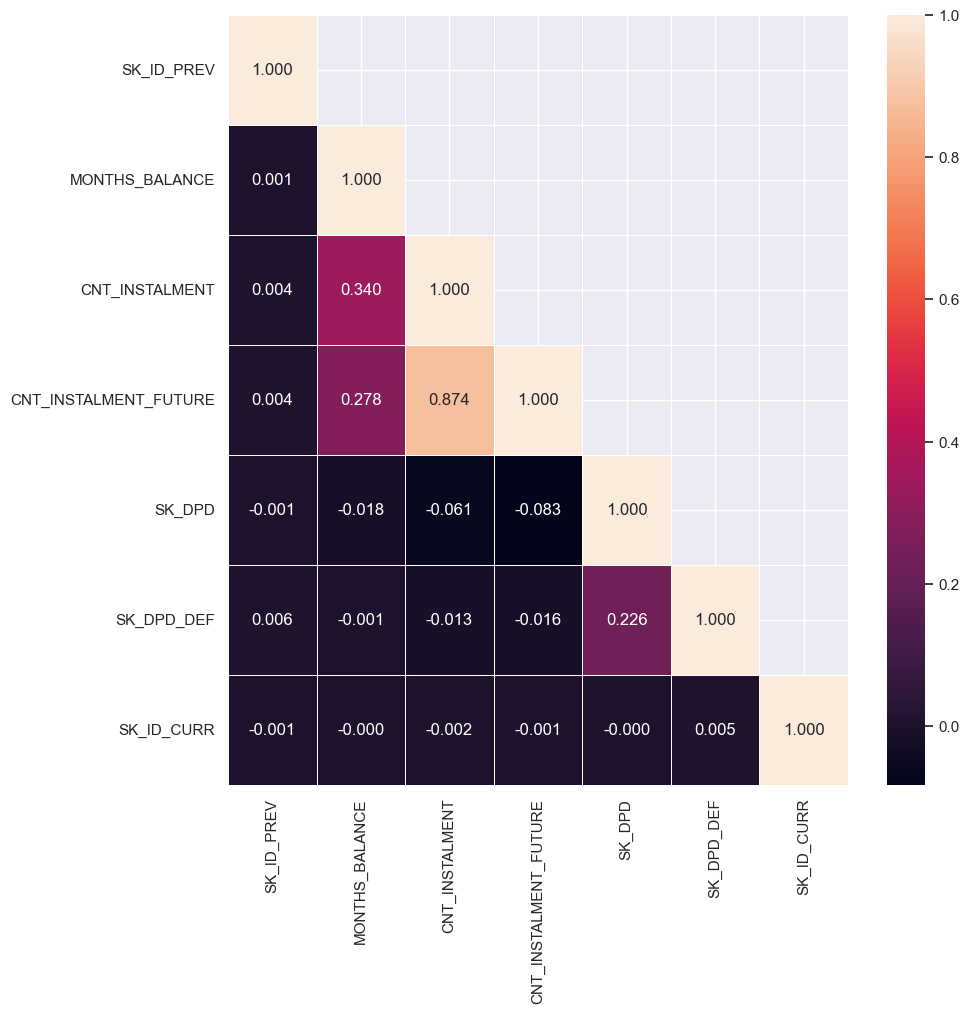

In [24]:
numeric_df = POS_df._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [25]:
def draw_distribution(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

C:\Users\swift\AppData\Local\Temp\ipykernel_3804\137913248.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,ax=ax[0],color=c)


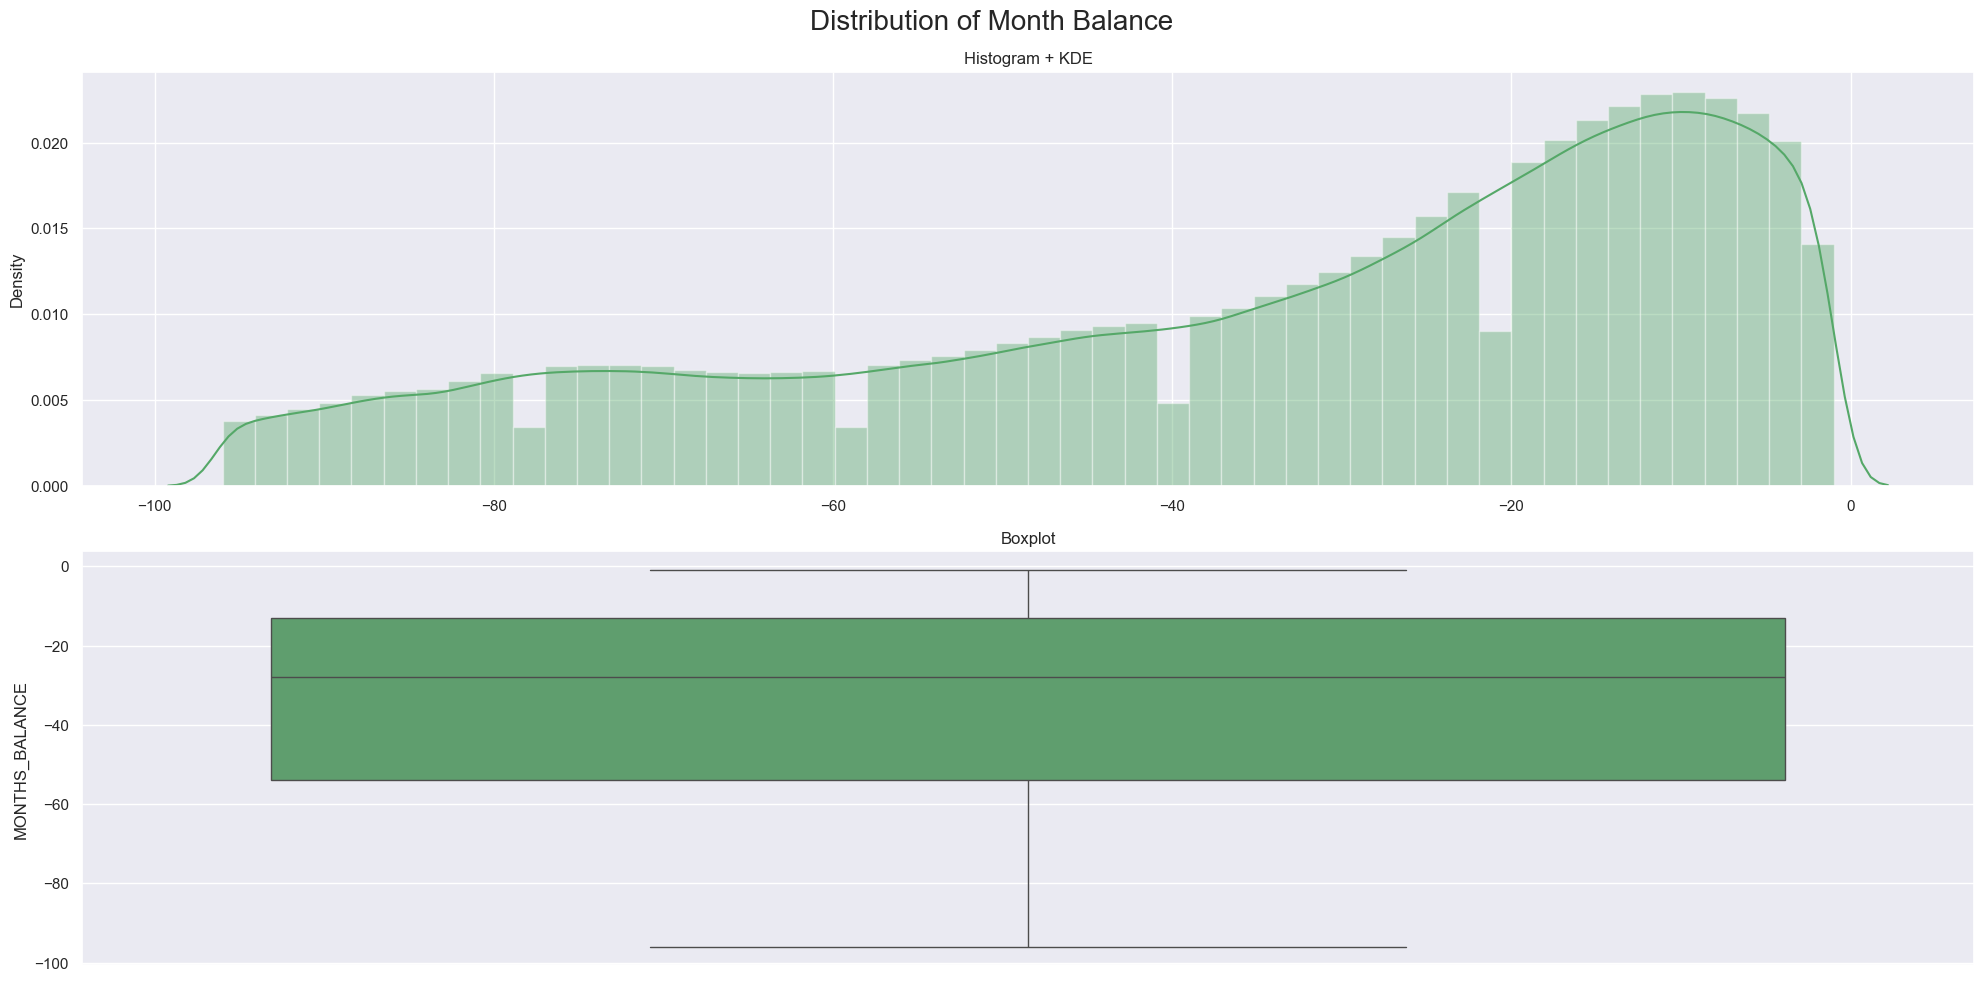

In [26]:
# distribution of MONTH_BALANCE
draw_distribution(POS_df['MONTHS_BALANCE'],'Distribution of Month Balance',"g")

C:\Users\swift\AppData\Local\Temp\ipykernel_3804\137913248.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,ax=ax[0],color=c)


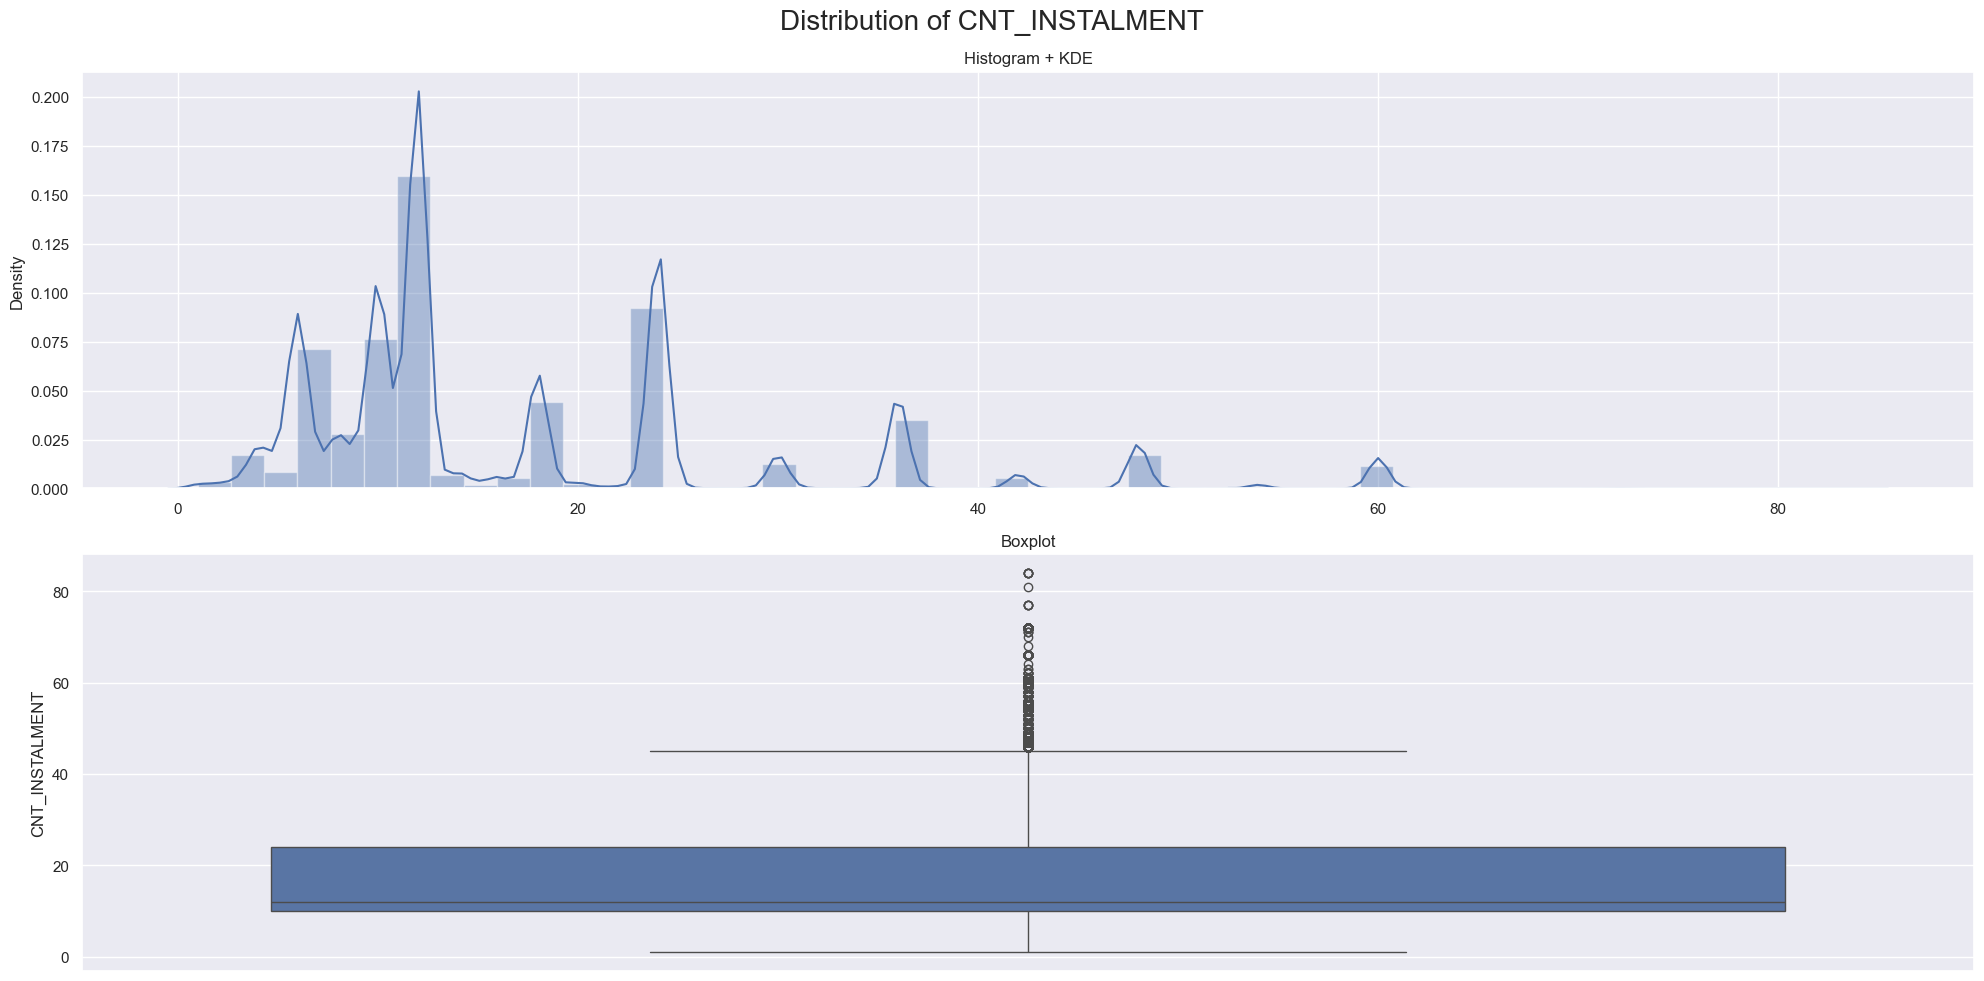

In [27]:
# distribution of CNT_INSTALMENT
draw_distribution(POS_df['CNT_INSTALMENT'],'Distribution of CNT_INSTALMENT',"b")

C:\Users\swift\AppData\Local\Temp\ipykernel_3804\137913248.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,ax=ax[0],color=c)


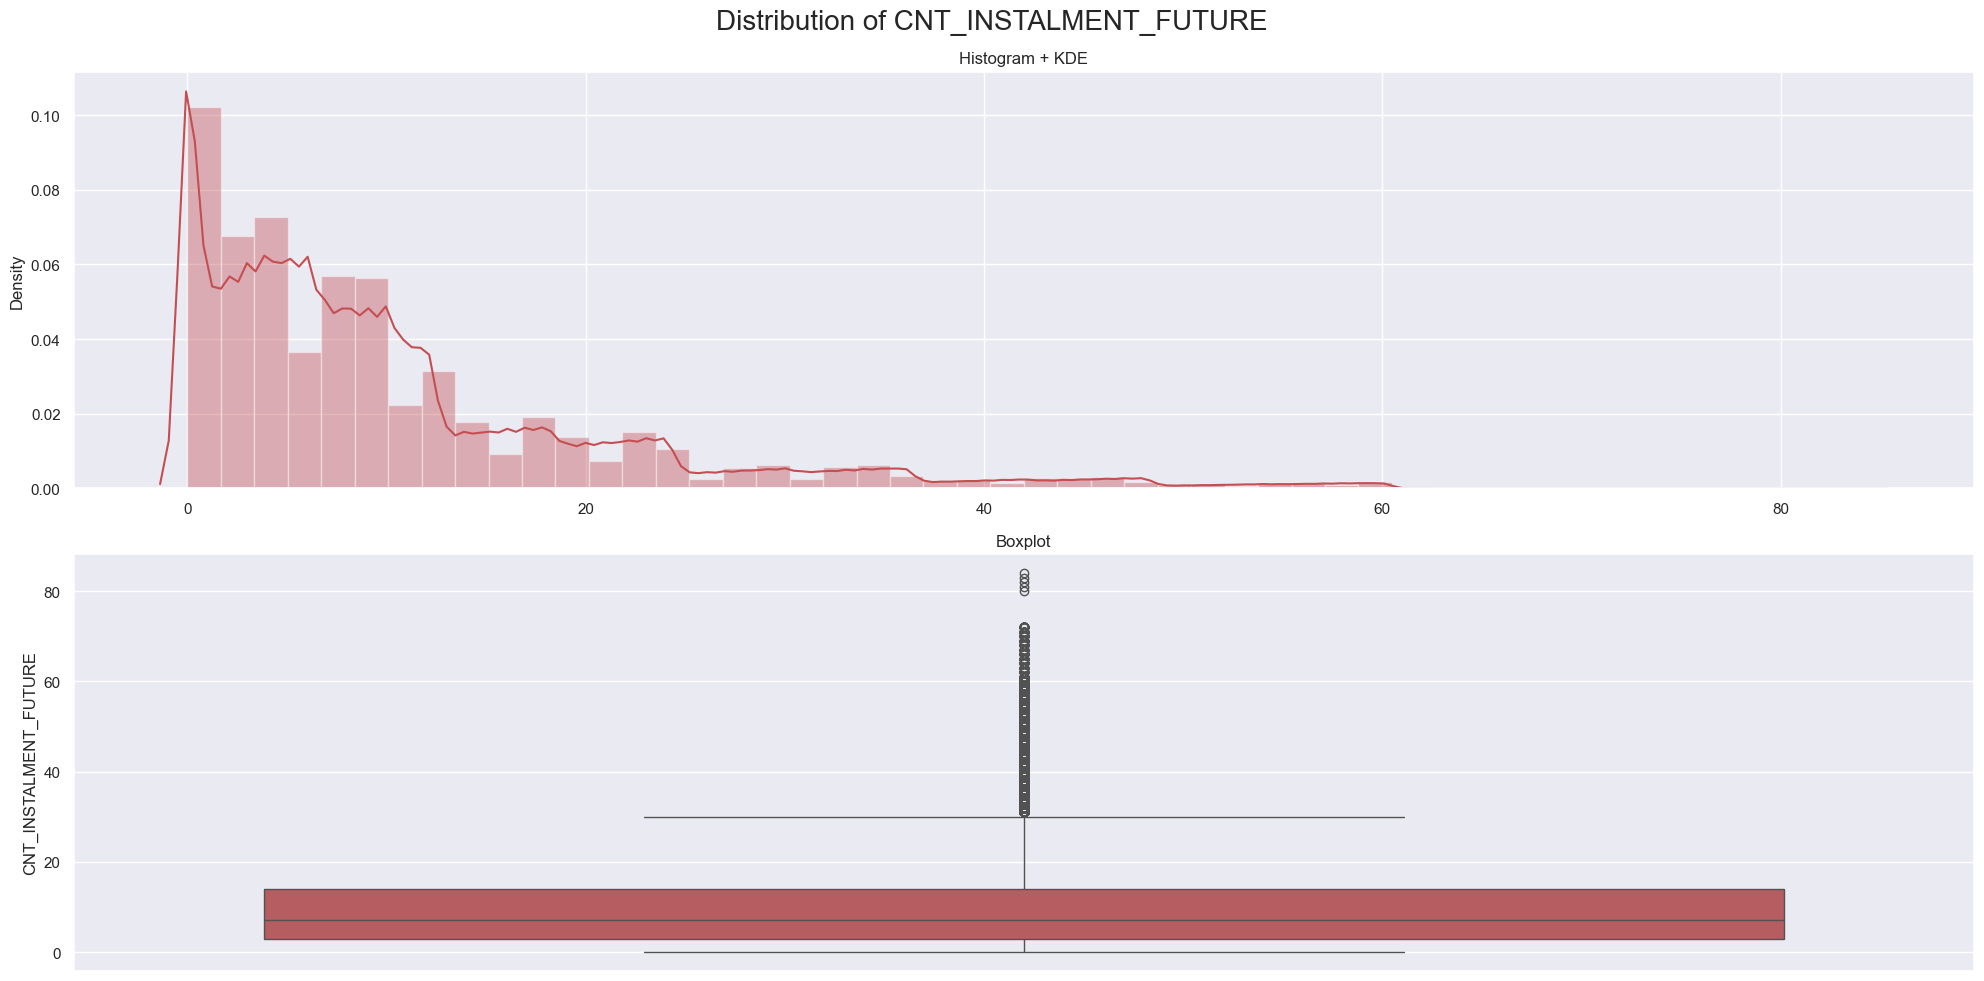

In [28]:
# distribution of CNT_INSTALMENT_FUTURE
draw_distribution(POS_df['CNT_INSTALMENT_FUTURE'],'Distribution of CNT_INSTALMENT_FUTURE',"r")

C:\Users\swift\AppData\Local\Temp\ipykernel_3804\137913248.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,ax=ax[0],color=c)


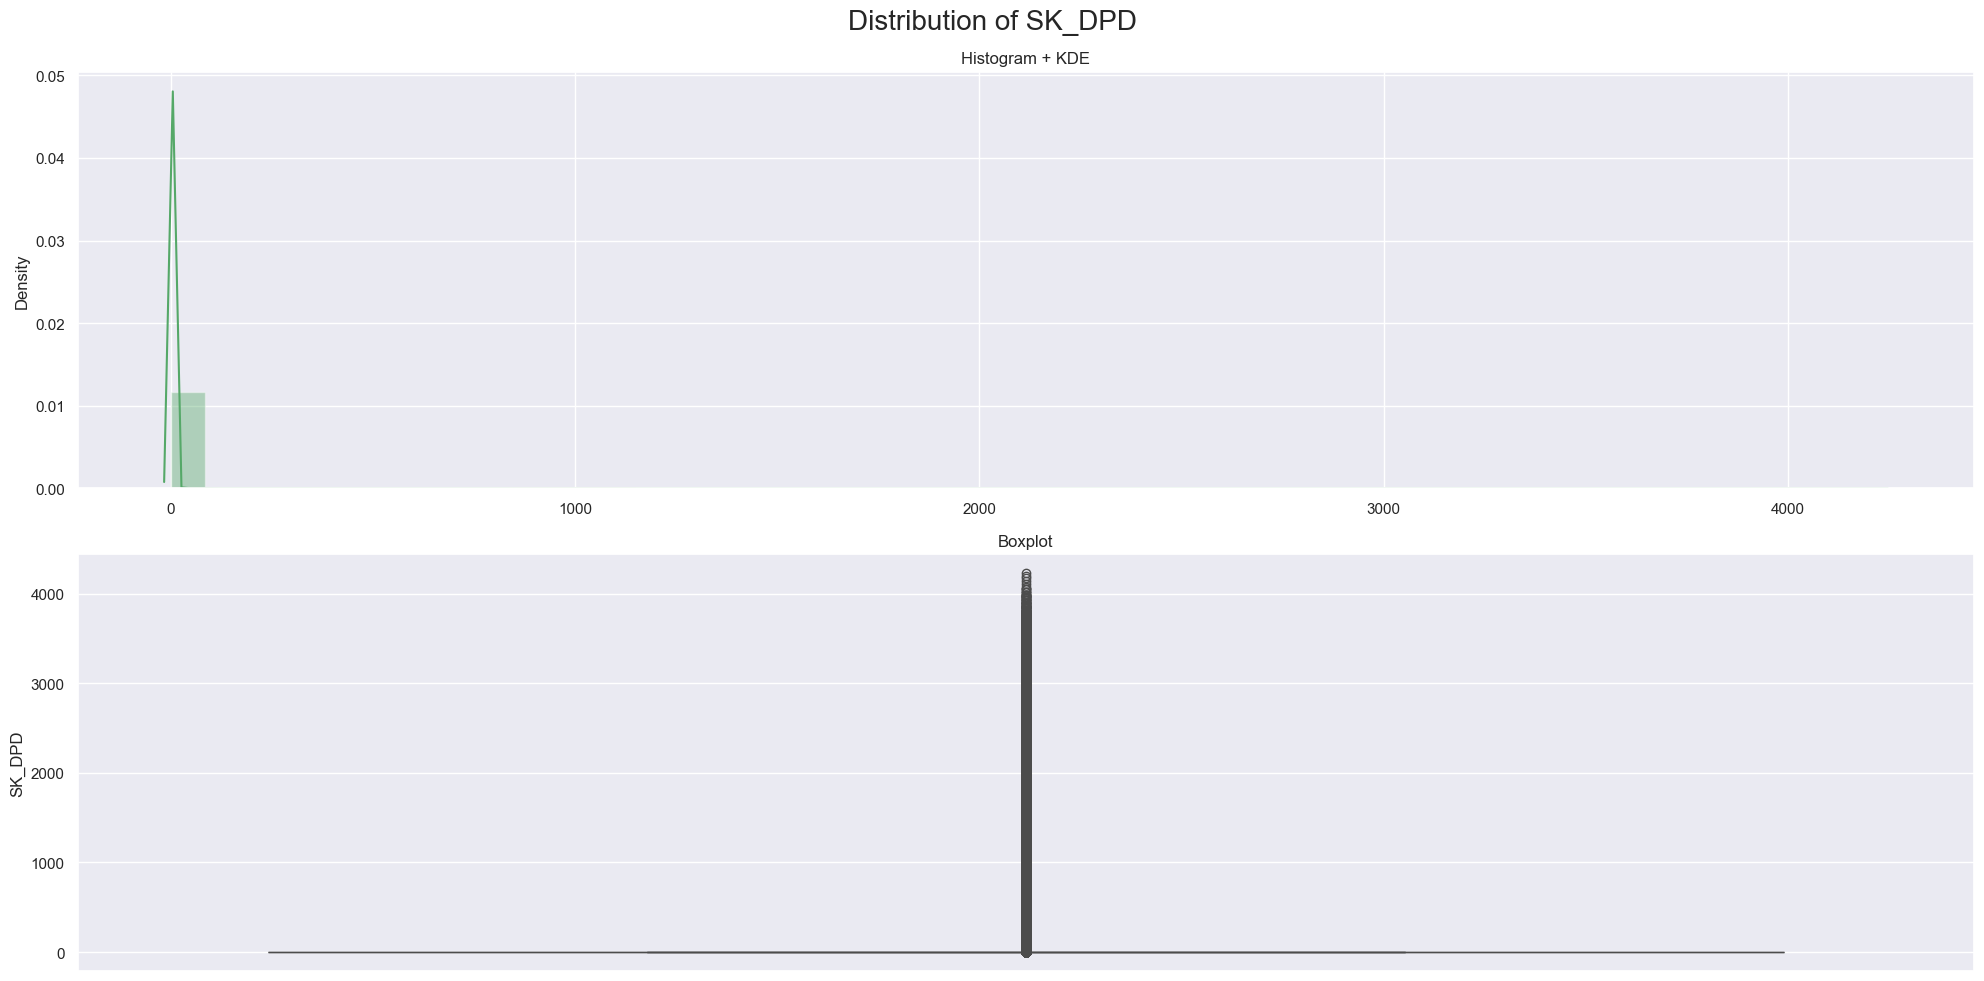

In [29]:
# distribution of SK_DPD
draw_distribution(POS_df['SK_DPD'],'Distribution of SK_DPD',"g")

C:\Users\swift\AppData\Local\Temp\ipykernel_3804\137913248.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,ax=ax[0],color=c)


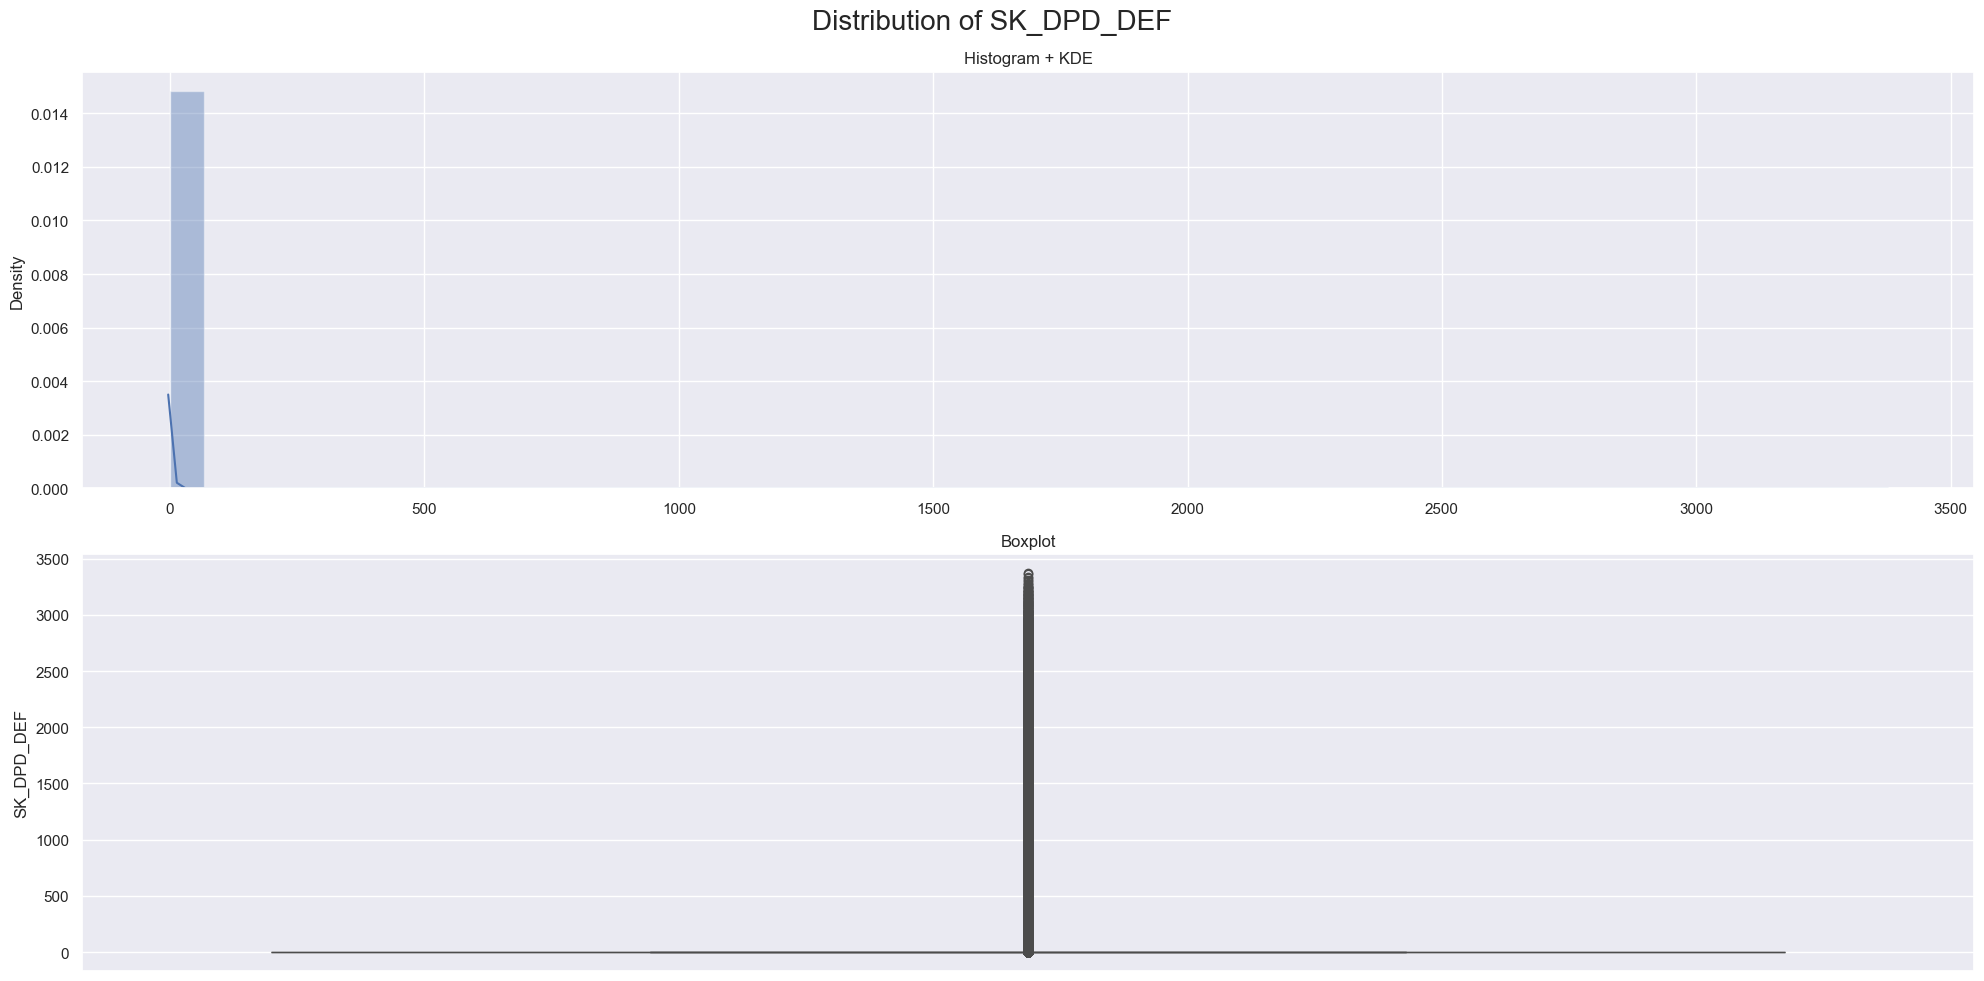

In [30]:
# distribution of SK_DPD_DEF
draw_distribution(POS_df['SK_DPD_DEF'],'Distribution of SK_DPD_DEF',"b")

###

In [32]:
curr_df = pd.read_csv(r"C:\Users\swift\Downloads\input\inputs\application_train.csv")


In [33]:
prev_df_merged = pd.merge(curr_df[["SK_ID_CURR", "TARGET"]], POS_df, how= "left", on=["SK_ID_CURR"])
prev_df_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,278621,0,"2,396,755.00",-66.00,12.00,1.00,Active,0.00,0.00
1,278621,0,"2,636,178.00",-23.00,6.00,1.00,Active,0.00,0.00
2,278621,0,"1,810,518.00",-23.00,12.00,10.00,Active,0.00,0.00
3,278621,0,"1,810,518.00",-25.00,12.00,12.00,Active,0.00,0.00
4,278621,0,"2,396,755.00",-67.00,12.00,2.00,Active,0.00,0.00
...,...,...,...,...,...,...,...,...,...
6848110,258328,0,"1,743,609.00",-28.00,12.00,7.00,Active,0.00,0.00
6848111,258328,0,"1,743,609.00",-32.00,12.00,11.00,Active,0.00,0.00
6848112,258328,0,"1,359,084.00",-10.00,12.00,7.00,Active,0.00,0.00
6848113,258328,0,"1,743,609.00",-25.00,12.00,4.00,Active,5.00,5.00


In [34]:
prev_df_merged.drop("SK_ID_PREV", axis=1, inplace=True)


Plotting 5 columns: ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']


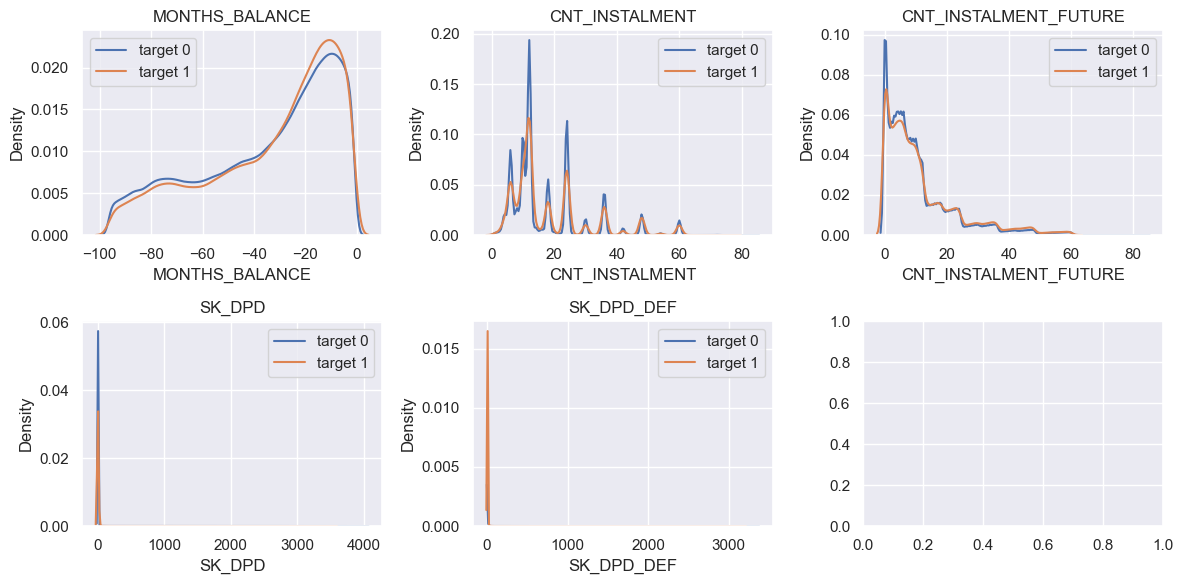

In [35]:
# Plot the distribution of the numerical features with hue = target
cols_to_plot = prev_df_merged.drop(columns = ["NAME_CONTRACT_STATUS"]).var()[prev_df_merged.drop(columns = ["NAME_CONTRACT_STATUS"]).var() > 0.1].index.tolist()
cols_to_plot.remove('SK_ID_CURR')
print(f'Plotting {len(cols_to_plot)} columns: {cols_to_plot}')
ncol, nrow = 3, len(cols_to_plot)//3 + 1
fig, ax = plt.subplots(nrow, ncol, figsize=(12, 6))

for i, col in enumerate(cols_to_plot):
    # kde plot
    sns.kdeplot(prev_df_merged.loc[prev_df_merged['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol])
    sns.kdeplot(prev_df_merged.loc[prev_df_merged['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol])
    ax[i//ncol, i%ncol].set_title(col)
    ax[i//ncol, i%ncol].legend()

plt.tight_layout()
plt.show()

[INFO] creating woe binning ...


C:\Users\swift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_bin = dtm.groupby('bin', group_keys=False)['y'].agg([n0, n1])\
C:\Users\swift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scorecardpy\woebin.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning = dtm.groupby(['variable','bin'], group_keys=False)['y'].agg([n0, n1])\
C:\Users\swift\AppData\Local\Packages\Python

Binning on 6848115 rows and 4 columns in 00:02:50


{'MONTHS_BALANCE': <Figure size 640x480 with 2 Axes>,
 'CNT_INSTALMENT': <Figure size 640x480 with 2 Axes>,
 'CNT_INSTALMENT_FUTURE': <Figure size 640x480 with 2 Axes>}

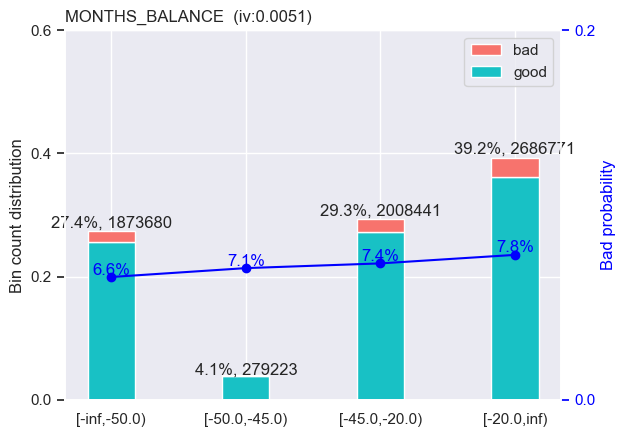

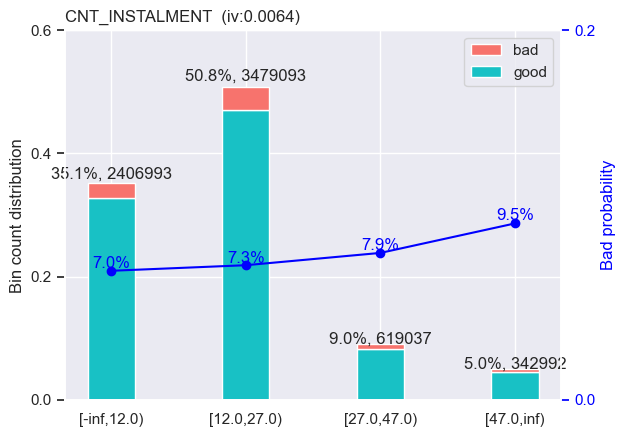

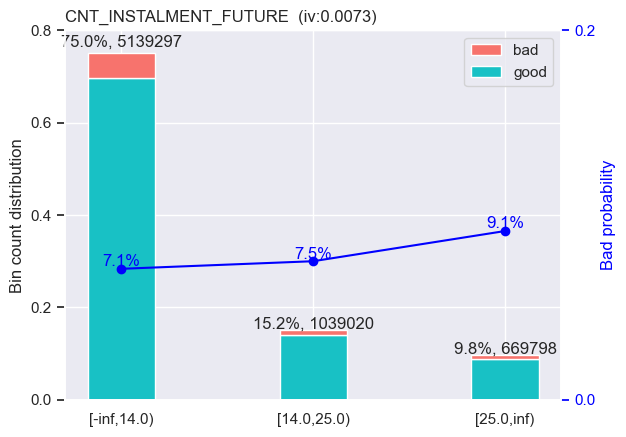

In [47]:
import scorecardpy as sc

bins = sc.woebin(prev_df_merged.drop(columns = ["NAME_CONTRACT_STATUS", "SK_ID_CURR","SK_DPD","SK_DPD_DEF"]), y="TARGET" ,breaks_list = {"MONTHS_BALANCE":[ -50,-45,-20,]})
sc.woebin_plot(bins)

CNT_INSTALLMENT
The higher CNT_INSTALLMENT is, the less likely to pay their current loan on time. 9.5% of the customers have Term of previous credit over 47 months are tagged as 1, compared to only 7% of the customers with Term of previous credit under 12 months


CNT_INSTALLMENT_FUTURE
The higher CNT_INSTALLMENT_FUTURE is, the less likely to pay their current loan on time. 9.1% of the customers have Term of previous credit over 47 months are tagged as 1, compared to only 7.1% of the customers with Term of previous credit under 14 months

###Customers with previously approved loans are more likely to pay their current loan on time than customers whose previous loan got declined
7% among the customers that have their previously loan approved are consider as defaulter
90% of the customer group whose previously loan got declined are capable of paying their current loan

##ANALYZE CATEGORICAL FEATURES

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

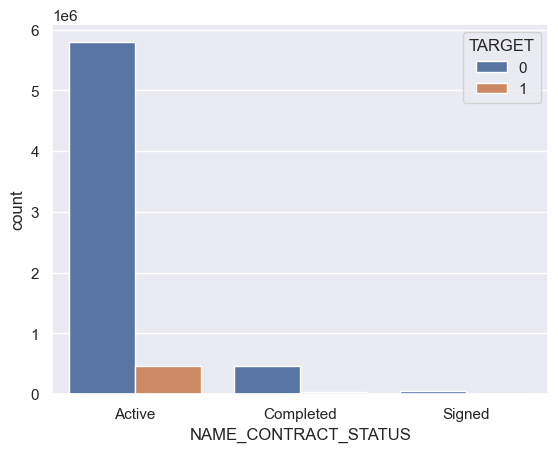

In [37]:
filtered_df = prev_df_merged[prev_df_merged['NAME_CONTRACT_STATUS'].isin(['Active', 'Completed','Signed'])]

sns.countplot(data=filtered_df,x=filtered_df['NAME_CONTRACT_STATUS'], hue='TARGET', )
